In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import PIL

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
d1 = digits.data[0]

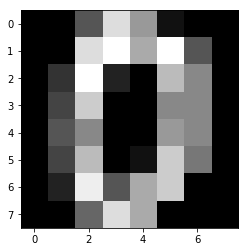

In [6]:
plt.imshow(d1.reshape((8, 8)), cmap='gray')

In [7]:
X, y = digits.data, digits.target

In [8]:
from sklearn.model_selection import learning_curve
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(Dense(16, input_shape=(64,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [10]:
initial_weights = model.get_weights()

In [11]:
y_cat = to_categorical(y, 10)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In [14]:
train_sizes = (len(x_train) * np.linspace(0.1, 0.999, 4)).astype(int)

In [15]:
train_sizes

array([ 125,  502,  879, 1255])

In [21]:
train_scores = []
test_scores = []

In [22]:
for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = train_test_split(x_train, y_train, train_size = train_size)
    model.set_weights(initial_weights)
    h = model.fit(X_train_frac, y_train_frac, verbose=0, epochs=300, callbacks=[EarlyStopping(monitor='loss', patience=1)])
    
    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])
    
    e = model.evaluate(x_test, y_test, verbose=0)
    test_scores.append(e[-1])
    
    print("Done size ", train_size)

Done size  125
Done size  502
Done size  879
Done size  1255


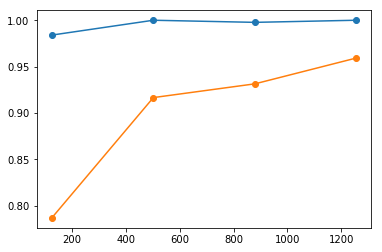

In [23]:
plt.plot(train_sizes, train_scores, 'o-', label='Training scores')
plt.plot(train_sizes, test_scores, 'o-', label='Test scores')
